## Load Data

In [11]:
# data processing
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# load data
df = pd.read_csv('data/processed_review_data.csv')

# Train-test split. 20% test. Stratify on y label
X = df.drop(columns = ['classification'])
y = df[['classification']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1, stratify = y)

X_test['review_text'] = X_test['review_text'].astype(str)

#flatten y
y_test = y_test.values.ravel()
# encode variables (minority class = 1)
y_test = np.where(y_test=='Negative', 1, 0)

## Load Functions

In [8]:
from functions import lower_case,expandContractions,alpha_num,consec_dup,lemma

for func in [lower_case,expandContractions,alpha_num,consec_dup,lemma]:
    X_test['review_text'] = X_test['review_text'].map(func)

## Testing
### Load Trained Models

In [12]:
# load trained models
import pickle
nb = pickle.load(open("data/nb_trained.sav", 'rb'))
lr = pickle.load(open("data/lr_trained.sav", 'rb'))
svm = pickle.load(open("data/svm_trained.sav", 'rb'))

### Fit Models to Test Data

In [48]:
nb.fit(X_test['review_text'],y_test)
lr.fit(X_test['review_text'],y_test)
svm.fit(X_test['review_text'],y_test)

Pipeline(steps=[('vect', CountVectorizer(ngram_range=(1, 2))),
                ('tfidf', TfidfTransformer()),
                ('svm', SVC(C=1, kernel='linear', random_state=1))])

## Evaluation

### Naive Bayes

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      5174
           1       0.97      0.95      0.96      3477

    accuracy                           0.97      8651
   macro avg       0.97      0.96      0.96      8651
weighted avg       0.97      0.97      0.97      8651



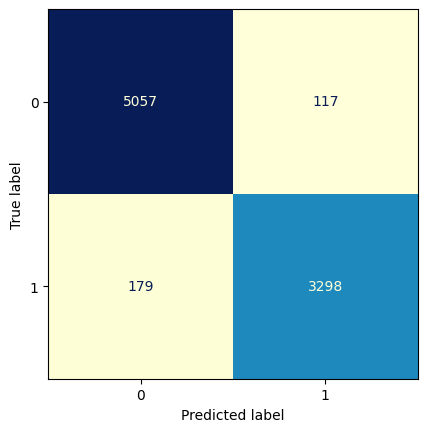

In [111]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

nb_pred = nb.predict(X_test['review_text'])
ConfusionMatrixDisplay.from_estimator(nb, X_test['review_text'], 
                                      y_test, 
                                      colorbar = False,
                                      cmap=plt.cm.YlGnBu)

print(classification_report(y_test,nb_pred))

### Logistic Regression

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      5174
           1       0.97      0.96      0.97      3477

    accuracy                           0.97      8651
   macro avg       0.97      0.97      0.97      8651
weighted avg       0.97      0.97      0.97      8651



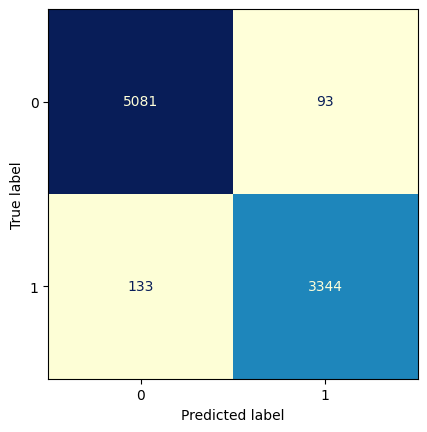

In [77]:
lr_pred = lr.predict(X_test['review_text'])
ConfusionMatrixDisplay.from_estimator(lr, X_test['review_text'], 
                                      y_test, 
                                      colorbar = False,
                                      cmap=plt.cm.YlGnBu)

print(classification_report(y_test,lr_pred))

### Support Vector Machine (linear kernel)

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      5174
           1       0.96      0.95      0.96      3477

    accuracy                           0.96      8651
   macro avg       0.96      0.96      0.96      8651
weighted avg       0.96      0.96      0.96      8651



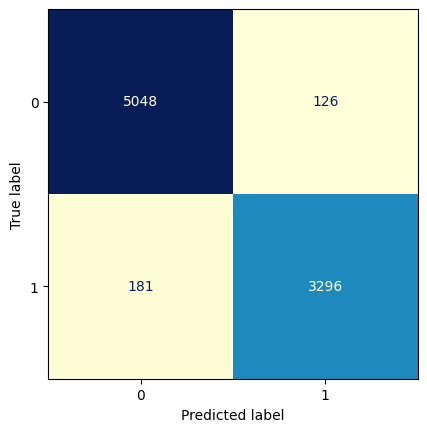

In [76]:
svm_pred = svm.predict(X_test['review_text'])
ConfusionMatrixDisplay.from_estimator(svm, X_test['review_text'], 
                                      y_test, 
                                      colorbar = False,
                                      cmap=plt.cm.YlGnBu)

print(classification_report(y_test,svm_pred))

In [79]:
coefs = lr.named_steps['lr'].coef_.ravel().tolist()
words = lr.named_steps['vect'].get_feature_names_out().tolist()

In [81]:
pd.DataFrame({'Tokens': words,
              'Coefs': coefs}).sort_values(by='Coefs',ascending=False,ignore_index=True).head(30)

,Tokens,Coefs
0,garbage,7.311678
1,refund,7.297232
2,boring,6.350763
3,broken,6.088720
4,constantly,5.930773
5,bad cod,5.913993
6,even,5.492677
7,unfinished,5.438177
8,dollar,5.282288
9,save,4.954841
